  DỰ ĐOÁN CƠ ĐAU TIM

# Mô tả các biến

**age:** Tuổi của bệnh nhân

**sex:** Giới tính của bệnh nhân

1 - Nam
0 - Nữ

**cp:** Loại đau ngực

0: Đau thắt ngực điển hình
1: Đau thắt ngực không điển hình
2: Đau không liên quan đến đau thắt ngực
3: Không triệu chứng


**TRTBPS:** Huyết áp nghỉ ngơi (tính bằng mmHg)

**CHOL:** Nồng độ cholesterol trong mg/dL được xác định bằng cảm biến BMI

**fbs:** (đường huyết lúc đói > 120 mg/dL) (1 = có, 0 = không)

**restecg:** Kết quả điện tâm đồ nghỉ ngơi

0 = bình thường
1 = Sóng ST-T bình thường
2 = Phì đại thất trái

**thalachh:** Nhịp tim tối đa đạt được

**exng:** Đau thắt ngực do gắng sức

1 = Có
0 = Không

**oldpeak:** Đỉnh trước

**slp:** Độ dốc

**caa:** Số lượng mạch máu lớn

**thall:** Kết quả test stress Thallium ~ (0.3)

**output:** Biến mục tiêu

# Import các thư viện

Nguyễn Văn Tiền-2100005343-stt:50

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KTDL va Ungdung/Do an/Dự đoán bệnh tim/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Viewing data

Data preprocessing

In [ ]:
missing_values = df.isnull().sum()
print("Các giá trị thiếu trong dữ liệu:")
print(missing_values)

Các giá trị thiếu trong dữ liệu:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
df.shape

(303, 14)

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# Modeling

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
tree = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()

In [ ]:
X = df.drop('output', axis = 1)
y = df['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state = 42)

### DecisionTreeClassifier

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
accuracy = cross_val_score(tree, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())

[0.87272727 0.83333333 0.83333333 0.74074074 0.74074074]

mean accuracy =  0.8041750841750842 
std accuracy =  0.053754332657259096


In [ ]:
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6451612903225806

### RandomForestClassifier

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
accuracy = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())

[0.83636364 0.87037037 0.83333333 0.81481481 0.81481481]

mean accuracy =  0.833939393939394 
std accuracy =  0.020322201445161656


In [ ]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8064516129032258

### KNN

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
accuracy = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())

[0.83636364 0.87037037 0.83333333 0.81481481 0.81481481]

mean accuracy =  0.833939393939394 
std accuracy =  0.020322201445161656


In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6451612903225806

Không có chuẩn hóa và bất kỳ thao tác nào với dữ liệu, đồng thời không điều chỉnh mô hình (nghĩa là không chọn siêu tham số), chỉ với việc sử dụng các mô hình, thu được các kết quả sau:

*   Decision tree - độ chính xác = 0,64
*   Random forest - độ chính xác = 0,839
*   KNN - độ chính xác = 0,645

Như vậy, hiện tại chúng tôi kết luận rằng mô hình **random forest** hoạt động tốt nhất, nhưng trong tương lai, chúng tôi sẽ tùy chỉnh từng mô hình để đạt được sự cải thiện chất lượng cho từng mô hình.

# DecisionTreeClassifier (siêu điều chỉnh của mô hình)

Có một số siêu tham số trong cây quyết định có thể được cấu hình để tối ưu hóa mô hình. Dưới đây là một số trong số chúng:

**max_depth:** Độ sâu tối đa của cây. Tham số này xác định cây sẽ được chia thành các mức (phân chia) bao nhiêu lần. Độ sâu lớn có thể dẫn đến việc huấn luyện quá mức, còn độ sâu nhỏ có thể dẫn đến thiếu hụt.

**min_samples_leaf:** Số lượng mẫu tối thiểu trong nút lá (sau khi phân tách). Nếu sau khi số lượng mẫu trong một trong các nhánh mới nhỏ hơn giá trị này, việc phân tách sẽ không được thực hiện.

**splitter:** Một chiến lược để chọn một thuộc tính để phân tách. Nó có thể là "best" (thuộc tính tốt nhất) hoặc "random" (thuộc tính ngẫu nhiên).

Hãy xem xét từng siêu tham số riêng biệt và sau đó kết hợp các giá trị tốt nhất để tìm ra sự kết hợp tốt nhất với độ chính xác cao nhất.

### max_depth

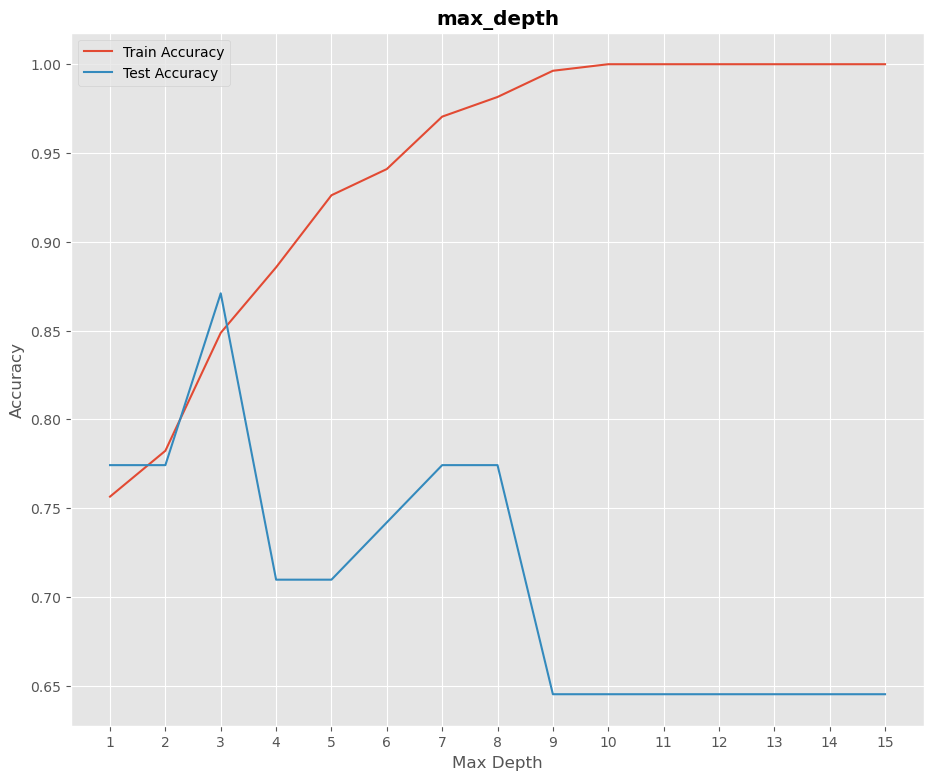

In [ ]:
max_depth_values = range(1,16)

train_accuracy = []
test_accuracy = []

for depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state = 42)

    tree.fit(X_train,y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))


plt.plot(max_depth_values, train_accuracy, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy')

plt.title('max_depth', fontweight = 'bold')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(range(1,16,1))

plt.show()

Tham số tốt nhất trong trường hợp này là giá trị của độ sâu cây = 3
     Trong giá trị này, độ chính xác trên dữ liệu kiểm tra thậm chí còn vượt quá độ chính xác trên dữ liệu huấn luyện, điều này cho thấy
     rằng mô hình với tham số này có khả năng khái quát hóa tuyệt vời

### min_samples_leaf

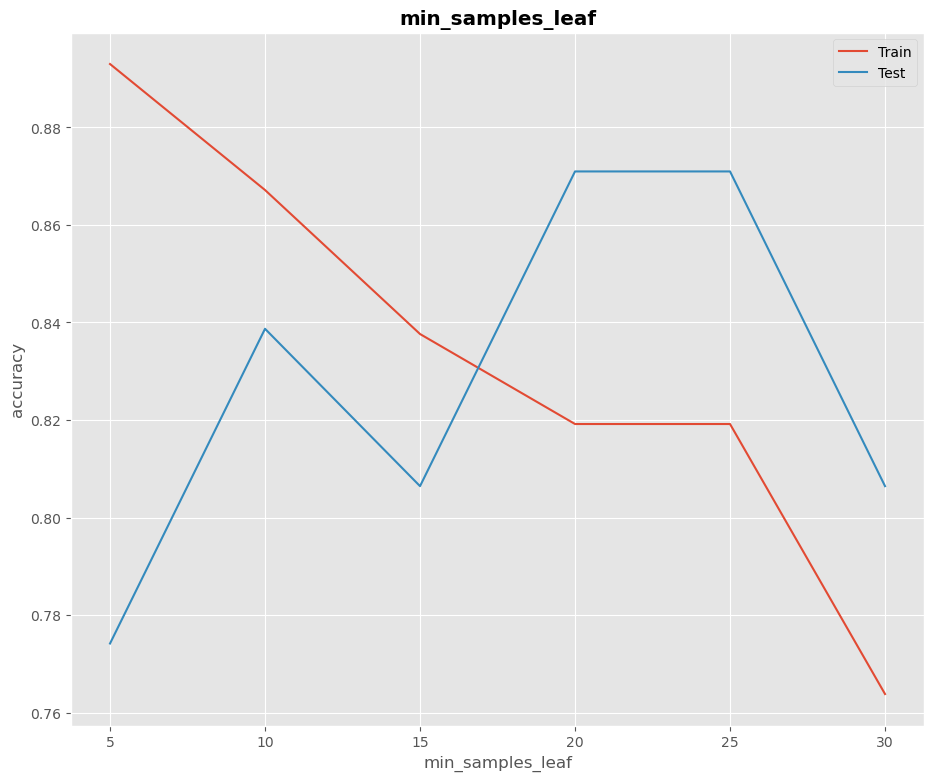

In [ ]:
min_samples_leaf = range(5,31,5)

train_accuracy = []
test_accuracy = []

for leaf in min_samples_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=leaf,random_state = 42)
    tree.fit(X_train,y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))

plt.plot(min_samples_leaf,train_accuracy, label = 'Train')
plt.plot(min_samples_leaf, test_accuracy, label = 'Test')

plt.title('min_samples_leaf', fontweight = 'bold')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')

plt.grid(True)
plt.legend()
plt.xticks(range(5,31,5))
plt.show()

Như có thể thấy từ biểu đồ này - khi số lượng phần tử trong trang tính tăng lên - độ chính xác của mô hình sẽ giảm, nhưng ngược lại,
     với sự gia tăng số lượng giá trị trong trang tính trên dữ liệu thử nghiệm, các giá trị tốt nhất hiển thị giá trị 20 và 25, trong đó
     nghĩa là ở những giá trị như vậy mô hình thể hiện độ chính xác tốt nhất và có khả năng học hỏi tốt
     (vì với số lượng lớn giá trị trong nút lá, dữ liệu không thể huấn luyện lại và ghi nhớ quá trình huấn luyện
     một tập dữ liệu, chẳng hạn như có giá trị 5 - nghĩa là mô hình được đào tạo lại do thực tế là có ít giá trị trong nút lá và
     mô hình chỉ ghi nhớ các giá trị nhưng không khái quát hóa chúng theo bất kỳ cách nào)

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf= 25,random_state = 42)

In [ ]:
tree.fit(X_train,y_train)

accuracy = cross_val_score(tree,X_train,y_train,cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())

[0.65454545 0.74074074 0.74074074 0.72222222 0.85185185]

mean accuracy =  0.7420202020202021 
std accuracy =  0.06341932954064633


In [ ]:
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8709677419354839

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.84      0.94      0.89        17

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



Sau khi tinh chỉnh các mô hình, chúng tôi đã xem xét độ chính xác riêng biệt - tăng từ 64% lên 87%, đây là một kết quả rất tốt.

Chúng tôi cũng xây dựng classification_report và nhận được các ước tính bổ sung về độ chính xác của mô hình, chẳng hạn như:

**Độ chính xác (precision):** Giúp giảm thiểu kết quả của các giá trị dương giả. Giá trị dương giả là trường hợp mô hình dự đoán giá trị thuộc lớp dương, trong khi thực tế giá trị không thuộc lớp dương.

**Độ nhớ lại (recall):** Giúp giảm thiểu kết quả của các giá trị âm giả. Giá trị âm giả là trường hợp mô hình dự đoán giá trị thuộc lớp âm, trong khi thực tế giá trị thuộc lớp dương.

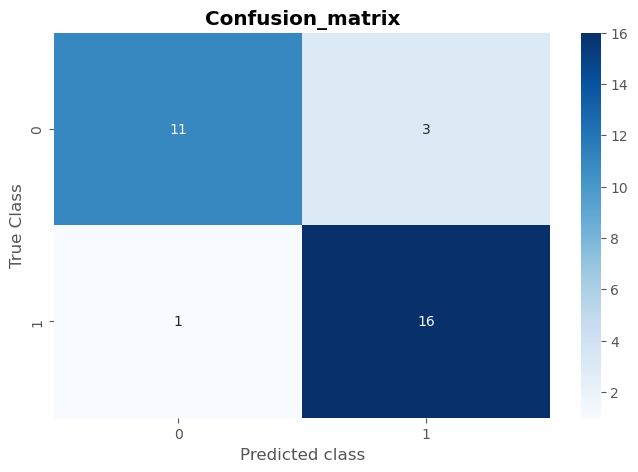

In [ ]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

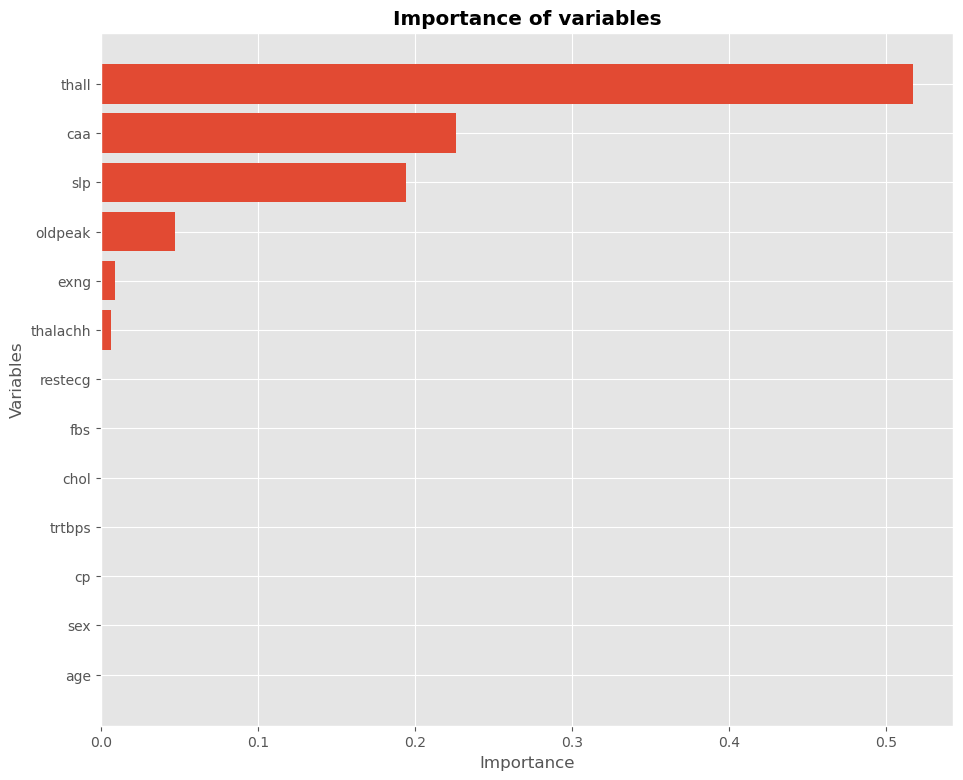

In [ ]:
importance = tree.feature_importances_
feature_names = X.columns


plt.barh(feature_names, sorted(importance))
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Importance of variables', fontweight = 'bold')


plt.show()

Cuối cùng, chúng tôi xem xét biến nào đóng vai trò quan trọng trong việc đào tạo mô hình
     Trong trường hợp của chúng tôi, đây là các biến thall (biến này đóng góp lớn nhất) - kết quả của một bài kiểm tra căng thẳng đối với thallium
     caa - Số lượng tàu lớn
     độ dốc slp
     oldpeak - Đỉnh trước
     exng - Đau thắt ngực do gắng sức
     thalachh - Đạt đến nhịp tim tối đa (tác động tối thiểu)

   Trong trường hợp này, chúng tôi đã sử dụng feature_importances_ vì chúng tôi đã đánh giá tầm quan trọng của các biến trong cây quyết định
     Tại sao phương pháp đặc biệt này

 Phương pháp này dựa trên cơ chế bên trong của cây quyết định và tính toán tầm quan trọng của các biến dựa trên tần suất
     biến được sử dụng để phân chia dữ liệu tại các nút của cây và mức độ cải thiện việc phân tách.
     Tầm quan trọng của một biến được đo lường tương đối so với các biến khác trong bối cảnh của một cây cụ thể.

## conclusion DecisionTreeClassifier

Trong cây quyết định, chúng tôi đã đạt được mức độ chính xác tăng lên, cụ thể là từ 64% lên 87%
     , chúng tôi cũng xem xét tầm quan trọng của các biến và nói chung những biến nào được sử dụng cho mô hình cây quyết định này
     (vì thậm chí một số biến đơn giản là không quan trọng theo bất kỳ cách nào và không được sử dụng theo bất kỳ cách nào trong mô hình này, điều này có thể được nhận thấy
     trong sơ đồ trên)

  Vì vậy, kết quả của mô hình này là khả năng dự đoán cơn đau tim với độ chính xác lên tới 87%.

# RandomForestClassifier (hyper tuning of the model)

Trong một khu rừng ngẫu nhiên, có một số siêu tham số có thể được tùy chỉnh để đạt được hiệu suất mô hình tốt hơn. Dưới đây là một số siêu tham số cơ bản của một khu rừng ngẫu nhiên:

  **n_estimators:** Số lượng cây trong một khu rừng ngẫu nhiên. Tham số này chỉ định số lượng cây sẽ được tạo trong quần thể. Nhiều cây hơn có thể cải thiện hiệu suất của mô hình nhưng cũng có thể dẫn đến tăng thời gian đào tạo. Giá trị mặc định là 100.

  **max_deep:** Độ sâu tối đa của mỗi cây. Hạn chế độ sâu của cây có thể giúp ích trong cuộc chiến chống đào tạo lại. Nếu giá trị là Không thì cây sẽ phát triển cho đến khi tất cả các lá đều sạch hoặc cho đến khi đạt được số lượng mẫu tối thiểu để phân tách.

  **min_samples_leaf:** Số lượng mẫu tối thiểu cần thiết để tạo thành một lá cây. Nếu còn lại ít mẫu trong nút hơn giá trị đã chỉ định thì quá trình tạo trang tính sẽ dừng lại. Việc tăng giá trị này có thể giúp loại bỏ nhiễu và tăng khả năng khái quát hóa của mô hình. Giá trị mặc định là 1.

  **max_features:** Số lượng đối tượng được xem xét ở mỗi phần của cây. Việc chỉ định một giá trị cụ thể có thể giới hạn số lượng tính năng có thể được sử dụng riêng biệt và có thể giúp chống lại việc trang bị quá mức. Theo mặc định, giá trị là "auto", có nghĩa là sqrt(n_features), trong đó n_features là số lượng tính năng.

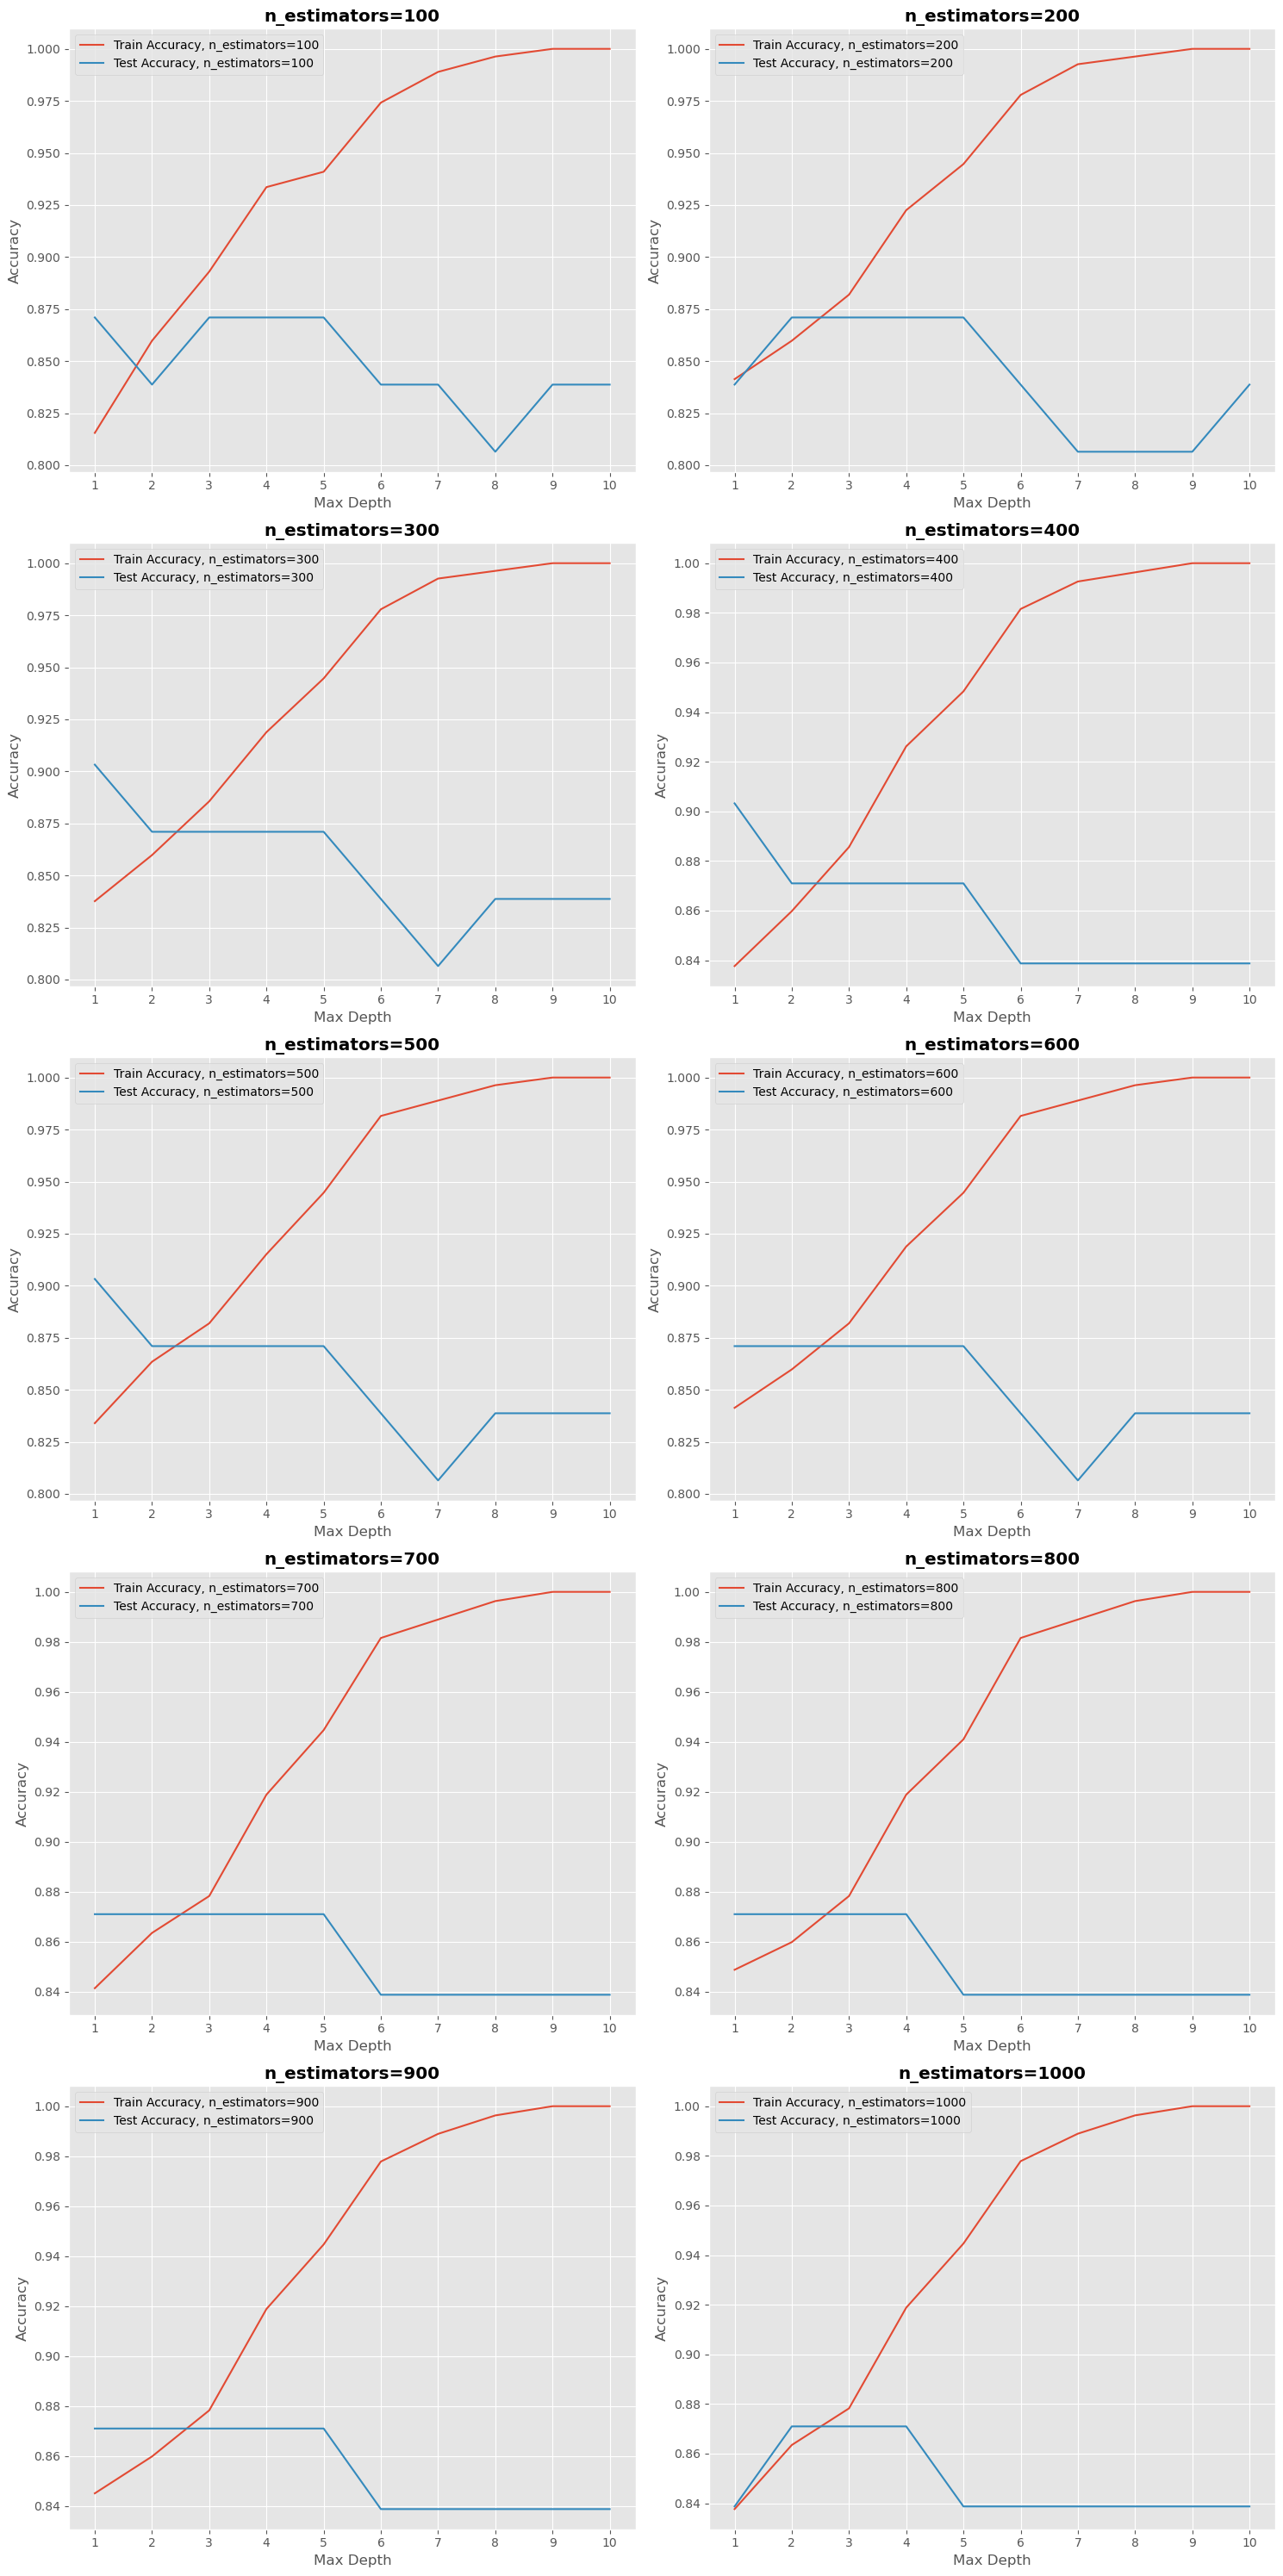

In [ ]:
n_estimators_values = range(100, 1001, 100)


max_depth_values = range(1, 11)


fig, axes = plt.subplots(5,2, figsize=(15, 30))

for i, n_estimators in enumerate(n_estimators_values):
    train_accuracy = []
    test_accuracy = []

    for max_depth in max_depth_values:
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        rfc.fit(X_train, y_train)
        train_pred = rfc.predict(X_train)
        test_pred = rfc.predict(X_test)

        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))

    ax = axes[i//2, i%2]

    ax.plot(max_depth_values, train_accuracy, label=f'Train Accuracy, n_estimators={n_estimators}')
    ax.plot(max_depth_values, test_accuracy, label=f'Test Accuracy, n_estimators={n_estimators}')

    ax.set_title(f'n_estimators={n_estimators}', fontweight='bold')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)
    ax.set_xticks(range(1, 11, 1))

plt.tight_layout()
plt.show()

Mô hình cho thấy độ chính xác cao về các thông số như - số cây -
     Độ sâu cây 300.400.500 - 1

  Hãy huấn luyện mô hình và kiểm tra nó trên mẫu thử nghiệm với các tham số này

In [ ]:
rfc = RandomForestClassifier(max_depth = 1,
                             n_estimators = 500,
                             random_state = 42)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=500, random_state=42)

In [ ]:
accuracy = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean accuracy', accuracy.mean(),'\nstd accuracy', accuracy.std())

[0.8        0.87037037 0.85185185 0.7962963  0.85185185]

mean accuracy 0.834074074074074 
std accuracy 0.030125480603944814


In [ ]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9032258064516129


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



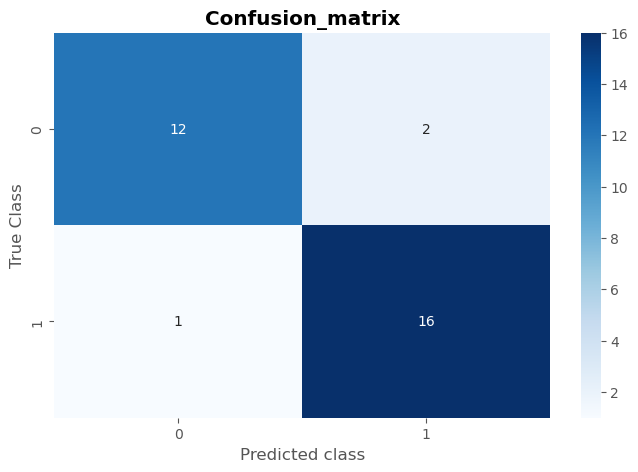

In [ ]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

Cuối cùng, chúng tôi đã có được mô hình có độ chính xác 90%
     . Chúng tôi đã cải thiện độ chính xác từ 80% lên 90%
     . Bây giờ mô hình rừng ngẫu nhiên là tốt nhất vì nó tốt hơn cây quyết định (và cây quyết định có
     Độ chính xác 87% với siêu tham số được định cấu hình)

  Các thông số khác, chẳng hạn như độ chính xác và thu hồi, cũng đã được cải thiện trong rừng ngẫu nhiên

  độ chính xác đã trở nên ít sai sót hơn và ít có khả năng đưa ra ước tính dương tính sai (điều này đóng vai trò quan trọng đối với tập dữ liệu y tế).
   một vai trò rất quan trọng) và giá trị của racall - bắt đầu cho kết quả âm tính giả ít hơn (nghĩa là, nếu một người
     bị bệnh, người mẫu nói rằng anh ta không bị bệnh - có ít kết quả như vậy hơn) và điều này cũng quan trọng đối với y tế
     một tập hợp dữ liệu, vì mọi thứ trong y học đều được phản ánh ở con người nên điều quan trọng là phải có một mô hình có chất lượng tốt và cao
     sự chính xác

  Tiếp theo, chúng ta hãy xem xét tầm quan trọng của các biến đóng vai trò quan trọng và được sử dụng trong việc xây dựng mô hình

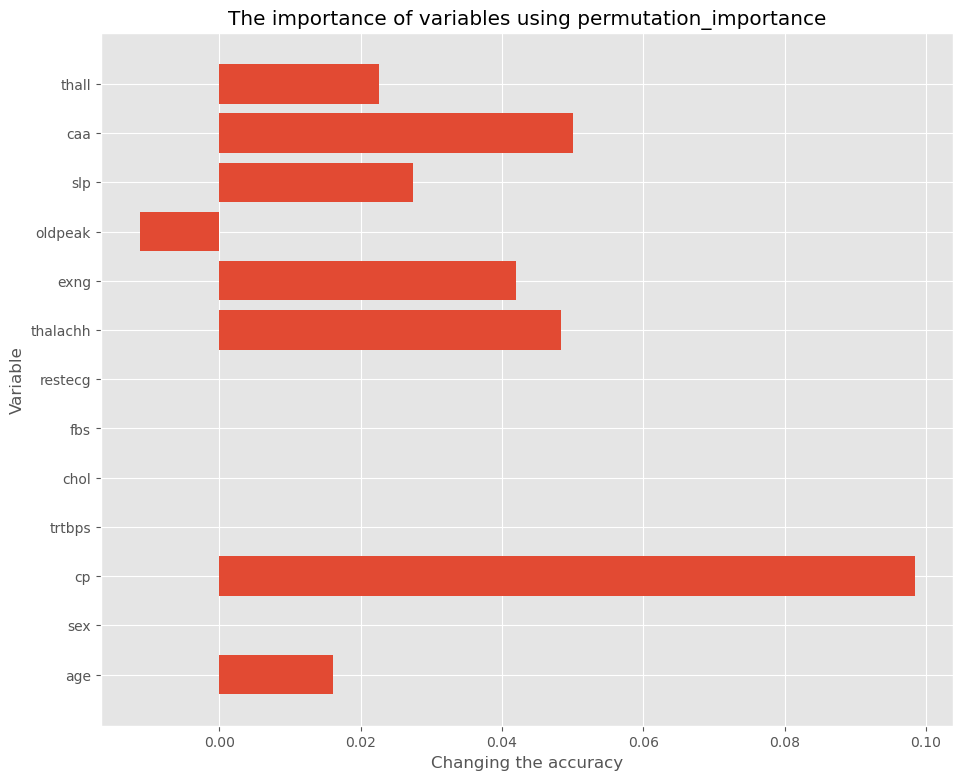

In [ ]:
result = permutation_importance(rfc, X_test, y_test, n_repeats= 20, random_state=42)

importances = result.importances_mean
feature_names = X_test.columns

plt.barh(feature_names, importances)
plt.xlabel('Changing the accuracy')
plt.ylabel('Variable')
plt.title('The importance of variables using permutation_importance')
plt.show()

Biến quan trọng nhất ảnh hưởng đến mô hình là cp - loại đau ngực
     một số biến (không có bất kỳ biểu đồ nào) không làm thay đổi độ chính xác của mô hình theo bất kỳ cách nào, do đó chúng có thể và
     không được sử dụng để xây dựng mô hình rừng ngẫu nhiên

  Ngoài ra còn có một biến oldpeak - biến này ảnh hưởng tiêu cực đến mô hình của chúng ta (tức là khi nó được thêm vào
     , độ chính xác giảm sút), vì vậy chúng ta cũng có thể kết luận rằng biến này có thể không được sử dụng trong mô hình này

## conclusion RandomForestClassifier

Kết luận có thể rút ra từ phân tích mô hình này là độ chính xác của dự đoán đã tăng 10%, điều này là tốt.

kết quả
     Chúng tôi xác định các biến không có ý nghĩa trong việc phân loại giá trị, đồng thời điều chỉnh các tham số của mô hình và
     ở giai đoạn này, mô hình rừng ngẫu nhiên là tốt nhất

# KNN (hyper tuning of the model)

Phương pháp hàng xóm gần nhất đo khoảng cách đến hàng xóm gần nhất và so sánh lớp của những hàng xóm này, sau đó
     định nghĩa lớp, do đó đối với mô hình này cần đảm bảo rằng tất cả các biến có cùng trọng số,
     Để mô hình hoạt động tốt hơn cần phải chuẩn hóa dữ liệu

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaler = df.copy()

In [ ]:
df_scaler.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
scaled = scaler.fit_transform(df_scaler[num])
df_scaler[num] = scaled

df_scaler.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [ ]:
X = df_scaler.drop('output', axis = 1)
y = df_scaler['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state = 42)

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

accuracy = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean =', accuracy.mean(),'\nstd =', accuracy.std())

[0.81818182 0.81481481 0.75925926 0.7962963  0.83333333]

mean = 0.8043771043771043 
std = 0.02545151675281381


In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8387096774193549

Chúng ta đã có thể thấy độ chính xác của mô hình đã thay đổi như thế nào trong mẫu thử nghiệm mà không cần chọn siêu tham số
  Do đó, chúng tôi kết luận rằng ở giai đoạn này mô hình đã cải thiện từ 64 lên 83%, đây là một chỉ báo rất tốt.

  Các bước tiếp theo là định cấu hình các tham số của mô hình, chẳng hạn như số lượng lân cận và chọn công thức tính độ dài

 Đối với thuật toán k-Nearest Neighbors (kNN), có các siêu tham số sau có thể được định cấu hình:

  **n_neighbors:** Số lượng hàng xóm gần nhất sẽ được tính đến trong quá trình phân loại hoặc hồi quy. Đây là một trong những siêu tham số quan trọng nhất của kNN.

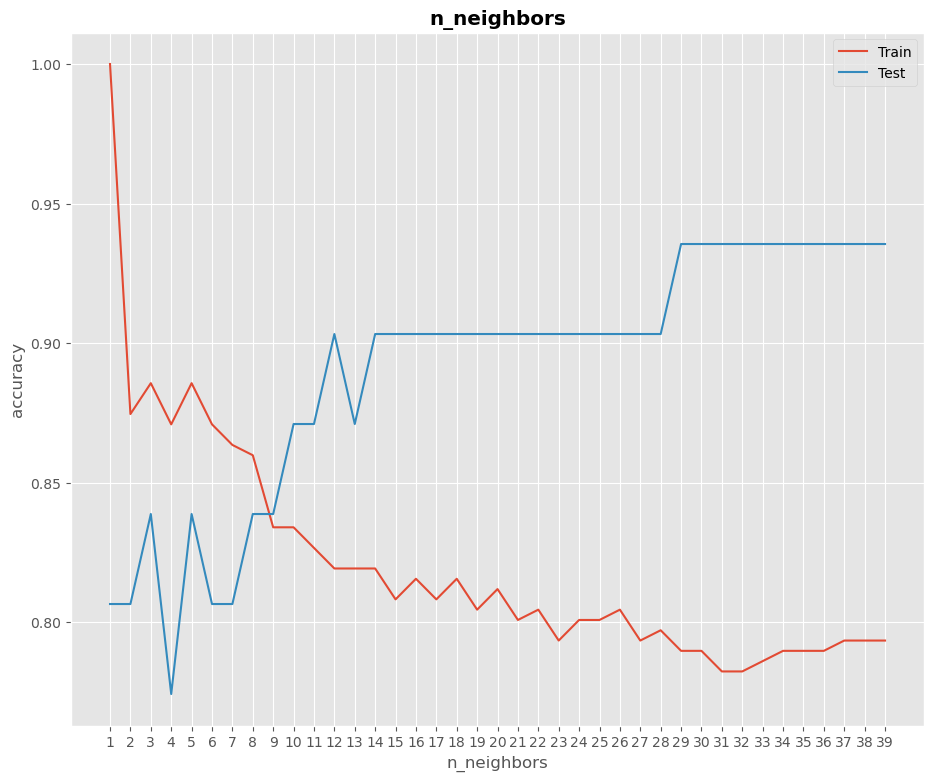

In [ ]:
n_neighbors = range(1,40,1)

train_accuracy = []
test_accuracy = []

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))

plt.plot(n_neighbors, train_accuracy, label = 'Train')
plt.plot(n_neighbors, test_accuracy, label = 'Test')

plt.title('n_neighbors', fontweight = 'bold')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.grid(True)
plt.legend()
plt.xticks(range(1,40,1))
plt.show()

Như bạn có thể thấy trên biểu đồ, với số lượng hàng xóm tăng lên, độ chính xác của mô hình sẽ tăng lên và độ chính xác đạt tới
     tối đa nếu giá trị của hàng xóm là 29

  Con số 29 có ý nghĩa gì khi mô hình có khả năng khái quát hóa tốt (ví dụ với giá trị 1, mô hình sẽ chỉ lấy hàng xóm đầu tiên và phân loại giống với nó) và với giá trị hàng xóm lớn thì kết quả là được so sánh và giá trị phổ biến nhất trong số các hàng xóm được chọn, vì vậy chúng tôi huấn luyện mô hình với giá trị hàng xóm 29

In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9354838709677419

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        17

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



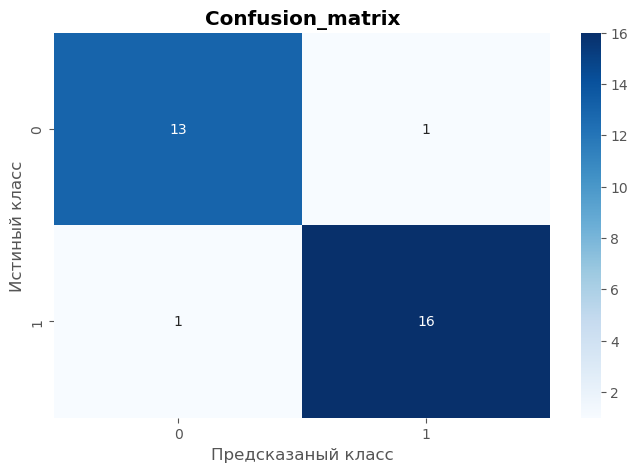

In [ ]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('Истиный класс')
plt.xlabel('Предсказаный класс')
plt.show()

Kết quả là mô hình knn đã trở thành mô hình tốt nhất trong số những mô hình mà chúng tôi đã đào tạo
     Độ chính xác của nó đạt 93%, các số liệu như độ chính xác và thu hồi cũng được cải thiện,
     nghĩa là mô hình chỉ cho kết quả dương tính giả từ 6% đến 7% (nghĩa là khi một người không thực sự bị bệnh, mô hình sẽ nói rằng anh ta bị bệnh)
     và cũng có từ 6% đến 7% kết quả âm tính giả đó là khi một người thực sự bị bệnh, mô hình nói rằng người đó khỏe mạnh

  Đây là những chỉ số quan trọng trong bộ dữ liệu y tế, chúng ta cũng có thể nói rằng độ chính xác đạt được 93% là một chỉ báo tốt, vì độ chính xác ban đầu của mô hình này là 64%.

# Kết luận về kết quả của mô hình

                       Mô hình cơ bản                 Mô hình sau khi điều chỉnh                 % độ chính xác đã tăng lên bao nhiêu    
    
    DesicionTree           64,5%                              87%                                    22,5%
    
    RandomForest           80,6%                              90%                                    9,4%
    
    KNN                    64,5%                              94%                                    29,5%
